 pandas.read_excel(io, sheetname=0, header=0, skiprows=None, skip_footer=0, index_col=None, names=None, parse_cols=None, parse_dates=False, date_parser=None, na_values=None, thousands=None, convert_float=True, has_index_names=None, converters=None, dtype=None, true_values=None, false_values=None, engine=None, squeeze=False, **kwds)[source]¶

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from smithplot import SmithAxes
%matplotlib inline

In [2]:
filenames = [
    'VNA_171024_104048_with sample 2.xls',
    'VNA_171024_103542_with chip 2.xls',
    'VNA_171024_095736_with sample.xls',
    'VNA_171024_094920_with U-chip.xls',
    'VNA_171024_093152_bare IDT.xls'
]
dfs = [pd.read_excel('/media/windows-share/sawdx/' + filename) for filename in filenames]
#dfs = [pd.read_excel(r'C:\Temp\Sparams\\' + filename) for filename in filenames]


In [3]:
len(dfs)

5

In [4]:
dfs[0].columns

Index(['Frequency (Hz)', 'Returnloss (dB)', 'Returnphase (°)',
       'Transmissionloss (dB)', 'Transmissionphase (°)', 'Rs (Ohm)',
       'Xs (Ohm)', '|Z| (Ohm)', 'Magnitude', 'SWR', 'Theta',
       'GroupDelay (nS)'],
      dtype='object')

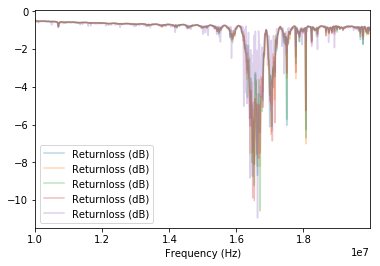

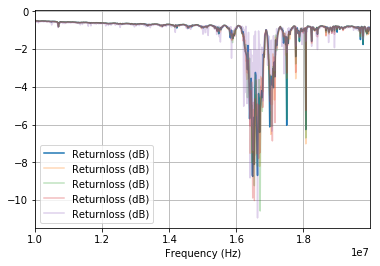

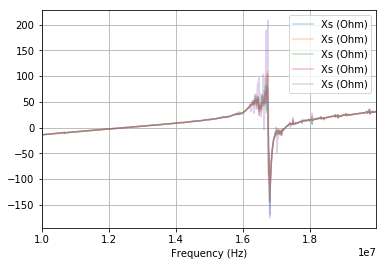

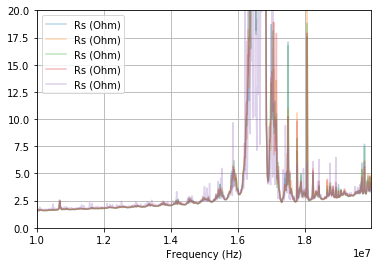

In [5]:
ax1 = dfs[0].plot('Frequency (Hz)', 'Returnloss (dB)', grid=True, kind='line', alpha=0.3,
                xlim=(1.5e7, 1.8e7))  #, figsize=(7,7));
ax2 = dfs[0].plot('Frequency (Hz)', 'Returnloss (dB)', grid=True, kind='line');
ax3 = dfs[0].plot('Frequency (Hz)', 'Xs (Ohm)', grid=True, kind='line', alpha=0.3);
ax4 = dfs[0].plot('Frequency (Hz)', 'Rs (Ohm)', grid=True, kind='line', ylim=(0, 20), alpha=0.3);

for df in dfs[1:] :
    df.plot('Frequency (Hz)', 'Returnloss (dB)', alpha=0.3, ax=ax1)
    df.plot('Frequency (Hz)', 'Returnloss (dB)', grid=True, kind='line', alpha=0.3, ax=ax2);
    df.plot('Frequency (Hz)', 'Xs (Ohm)', grid=True, kind='line', alpha=0.3, ax=ax3);
    df.plot('Frequency (Hz)', 'Rs (Ohm)', grid=True, kind='line', ylim=(0, 20), alpha=0.3, ax=ax4);



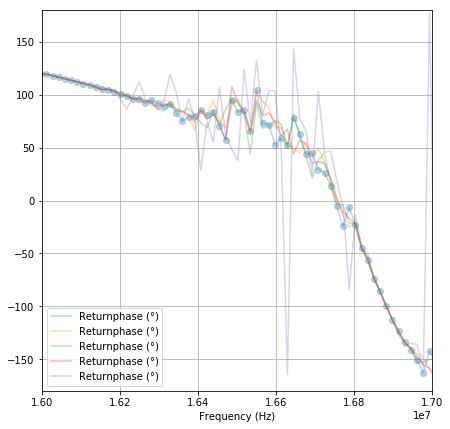

In [74]:
ax1 =  dfs[0].plot('Frequency (Hz)', 'Returnphase (°)', grid=True, kind='line',
               xlim=(1.6e7, 1.7e7), ylim=(-180, 180), figsize=(7,7),
               marker='o', alpha=0.3);
for df in dfs[1:] :
    df.plot('Frequency (Hz)', 'Returnphase (°)', xlim=(1.6e7, 1.7e7), alpha=0.3,  grid=True, ax=ax1)

In [97]:
# series
cs = 361e-12
ls = 473e-9
rs = 2.5
# parallel
cp = 1211e-12
lp = 126e-9
rp = 400
def znet(f):
    """Impedance of the network at f Hz"""
    w = 2 * np.pi * f
    zcs = 1 / (w * cs * 1j)
    zls = w * ls * 1j
    zcp = 1 / (w * cp * 1j)
    zlp = w * lp * 1j
    ys = 1 / (zcs + zls)
    ycp = 1 / zcp
    ylp = 1 / zlp
    yrp = 1 / rp
    yt = ycp + ylp + ys + yrp
    zt = 1 / yt
    return rs + zt
freqs = np.linspace(10e6, 20e6, 200)
zs = [znet(f) for f in freqs]

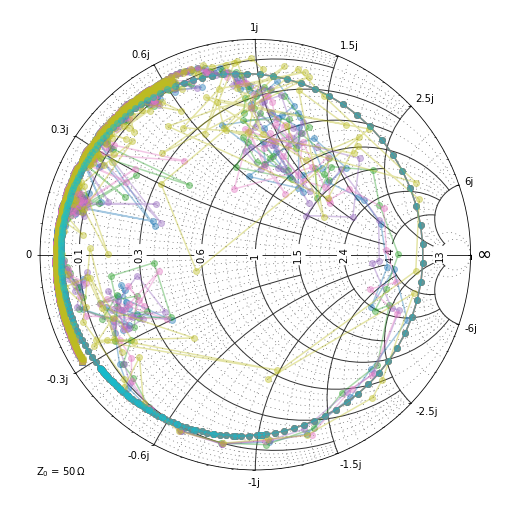

In [98]:
plt.figure(figsize=(9, 9))

for df in dfs:
    df['rho'] = 10**(df['Returnloss (dB)']/20)
    df['phase (rads)'] = np.pi * df['Returnphase (°)'] / 180
    df['s11'] = df['rho'] * np.exp(1j * df['phase (rads)'])
    #df['phase_offsets'] = df['Frequency (Hz)'] * 2 * np.pi * time_offset_15e6
    #df['s11_offset'] = df['rho'] * np.exp(1j * (df['phase (rads)'] + df['phase_offsets']))
    ax = plt.subplot(1, 1, 1, projection='smith')
    plt.plot(df['s11'], datatype=SmithAxes.S_PARAMETER, alpha=0.4);
    plt.plot(zs, datatype=SmithAxes.Z_PARAMETER, alpha=0.4);
    #plt.plot(df['s11_offset'], datatype=SmithAxes.S_PARAMETER);
    # plt.savefig('c:/Temp/Smith of all.jpg')

In [48]:
#df['offset_phase (deg)'] = 0 * (df['phase (rads)'] - df['phase_offsets']) * 180 / np.pi
#df['offset_phase (deg)']
#df['phase_offsets']

df=dfs[1]
df[df['Xs (Ohm)'] > -1]

below_target = df['Xs (Ohm)'] < -0.6 * 50
above_target = df['Xs (Ohm)'] > -1.0 * 50
Xs_below = df['Xs (Ohm)'][below_target]
#Xs_below = df['Xs (Ohm)'][above_target]
Xs_below
df[433:440]

,Frequency (Hz),Returnloss (dB),Returnphase (°),Transmissionloss (dB),Transmissionphase (°),Rs (Ohm),Xs (Ohm),|Z| (Ohm),Magnitude,SWR,Theta,GroupDelay (nS),rho,phase (rads),s11,Zbandpass,Zlowpass
433,16850926,-1.398097,-71.392845,0,0,11.648417,-68.289534,69.275870,0.851325,12.452118,-80.319995,0,0.851325,-1.246040,(0.271638638794-0.806824581112j),(189.011081181+205.414660942j),(3.33415455333-8.33132724789j)
434,16866748,-1.071745,-86.743109,0,0,6.505121,-52.501847,52.903314,0.883920,16.229427,-82.936895,0,0.883920,-1.513953,(0.0502180016405-0.882491862621j),(256.931597615-210.900716356j),(8.66791071483+0.458737894707j)
435,16882570,-1.011466,-100.339187,0,0,4.919344,-41.464774,41.755567,0.890075,17.194254,-83.234106,0,0.890075,-1.751249,(-0.159746325477-0.875622607559j),(50.1742664975-123.436728794j),(49.8178033425-0.0822969281133j)
436,16898392,-1.044048,-113.133837,0,0,4.302871,-32.839835,33.120530,0.886743,16.658898,-82.535288,0,0.886743,-1.974558,(-0.34838368562-0.815439352668j),(20.9224632074-69.8560672727j),(17.0170487197-44.4413230046j)
437,16914214,-1.281753,-125.022282,0,0,4.672613,-25.836935,26.256057,0.862804,13.577729,-79.748853,0,0.862804,-2.182050,(-0.49515910536-0.706575486622j),(14.3168565737-43.5555724256j),(5.69801069435-33.699246322j)
438,16930036,-1.868409,-134.682676,0,0,6.278112,-20.592275,21.528040,0.806454,9.333456,-73.044739,0,0.806454,-2.350656,(-0.567082060192-0.573398507288j),(14.2932086925-29.0522030591j),(4.05663565384-29.0075932885j)
439,16945858,-1.954038,-140.347327,0,0,6.318288,-17.771911,18.861644,0.798543,8.927657,-70.428630,0,0.798543,-2.449523,(-0.614819437366-0.509575639165j),(12.5375401245-23.3084385822j),(3.15871192625-27.5911148802j)


In [ ]:
# at 16.88, 4.9, -41.5j
# add a normalised admittance of 1.15S (0.87ohms)
# L = X / w
Lp = 0.87/(2*3.1415*12.37e6) # 11nH
# Now a series of 1.6ohms
Ls = 1.6/(2*3.1415*12.37e6) # 20nH
Lp*1e9, Ls*1e9

In [ ]:

plt.plot(df['Frequency (Hz)'], original_complex_z.real, alpha=0.6);
plt.plot(df['Frequency (Hz)'], offset_complex_z.real, alpha=0.6);
plt.plot(df['Frequency (Hz)'], df['Rs (Ohm)'], alpha=0.6);

In [ ]:
#df.assign(rho=df['Returnloss (dB)'])
dfs[0]['rho'] = 10**(df['Returnloss (dB)']/20)
ax1 = dfs[0].plot('Frequency (Hz)', 'rho', grid=True, kind='line',
                xlim=(1.6e7, 1.7e7), figsize=(7,7), marker='o', alpha=0.3);
for df in dfs:
    df['rho'] = 10**(df['Returnloss (dB)']/20)
    df.plot('Frequency (Hz)', 'rho', grid=True, kind='line', alpha=0.3, ax=ax1)

plt.savefig('c:/Temp/rho of all.jpg')    

In [ ]:
#rs = df['Rs (Ohm)'][df['Frequency (Hz)'] > 16e6]
low_threshold = 16.6e6
high_threshold = 16.8e6
below_resonance = df['Frequency (Hz)'] < low_threshold
above_resonance = df['Frequency (Hz)'] > high_threshold
Rs_below = df['Rs (Ohm)'][below_resonance]
Rs_above = df['Rs (Ohm)'][above_resonance]
Xs_below = df['Xs (Ohm)'][below_resonance]
Xs_above = df['Xs (Ohm)'][above_resonance]
over_16 = df['Frequency (Hz)'] > 16.6e6
under_17 = df['Frequency (Hz)'] < 16.8e6
between_16_17 = over_16 & under_17
Rs = df['Rs (Ohm)'][between_16_17]
#between_16_17
Xs = df['Xs (Ohm)'][between_16_17]

over_18 = df['Frequency (Hz)'] > 18e6
under_15 = df['Frequency (Hz)'] < 15e6
between_16_17 = over_16 & under_17

#Rs_above

In [ ]:
from smithplot import SmithAxes
# plot data
plt.figure(figsize=(9, 9))

ax = plt.subplot(1, 1, 1, projection='smith')
#plt.plot(df['Rs (Ohm)'], df['Xs (Ohm)'], datatype=SmithAxes.Z_PARAMETER);
# plt.plot(Rs_above, Xs_above, datatype=SmithAxes.Z_PARAMETER);
#plt.plot(Rs_below, Xs_below, datatype=SmithAxes.Z_PARAMETER);
#plt.plot(Rs, Xs, datatype=SmithAxes.Z_PARAMETER);
#plt.plot(1+2j, datatype=SmithAxes.S_PARAMETER);
#plt.plot(100 - 75j, datatype=SmithAxes.Z_PARAMETER)

#plt.plot(df['Frequency (Hz)'].values, df['rho'].values, datatype=SmithAxes.S_PARAMETER)


plt.plot(df['Rs (Ohm)'][over_18], df['Xs (Ohm)'][over_18], datatype=SmithAxes.Z_PARAMETER);
plt.plot(df['Rs (Ohm)'][under_15], df['Xs (Ohm)'][under_15], datatype=SmithAxes.Z_PARAMETER);
# Series resonance is at 12.54M, df[161]
df.loc(16)
#df[0:170]
df[under_15][-3:]

##Some possibilities
Add series R of 47 with, in parallel, a series LC resonant at the self-resonance. This will modify the resonance and provide (approx) matching at other frequencies.

Match at a frequency away from the resonance.

Damp the resonance to make it more manageable.

Measure both over a wider frequency range (1..100MHz) and also narrower around the resonance (to get better resolution on behaviour there).

What reference plane was used for the measurements?

In [ ]:

from cmath import exp
def P2R(radii, angles):
    return radii * exp(1j*angles)
P2R(0.3, 3.14/2)

Tapped impedance transformer of 2 Cs and 1 L

$R_L = R_S \left(\frac{C_1 + C_2}{C_1}\right)^2$

The inductor should be close to its max value of

$L_{max} = \frac{R_L}{\omega \sqrt{\frac{R_L}{R_S} - 1}}$

In [ ]:
# Assume C1 = C2 then
Rl = 50 * 4
Rs = 50
w = 2 * 3.1415 * 16e6
Lmax = Rl/(w*(Rl/Rs - 1)**0.5)
Lmax

(50.8788993508-123.532723917j) (50.8788993508-1.03272391735j) 
par (-0+59.40594059405941j) 560.131987410354 
ser 122.50000000000001j 1155.0388357057675


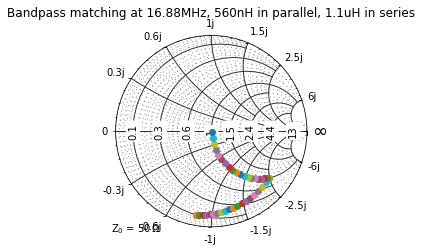

In [64]:
16.88, 4.9, -41.5
w = 2 * 3.1415 * 16.88e6
Zstart = 4.98 -41.5j
Ypar = -2.525j/150
Zpar = 1 / Ypar
Yparpath = np.linspace(1/Zstart, 1/Zstart + Ypar, 20)
Zparpath = [1/Y for Y in Yparpath]
#Y = 1/Zstart + Ypar
#Zpar = 1/(Y)
Zser = 0 +2.45*50j
Zserpath = [Zparpath[-1] + Zstep for Zstep in np.linspace(0j, Zser, 20)]
#Zres = Zpar + 125*1.6j
#plt.figure(figsize=(9, 9))
ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot([Zstart], datatype=SmithAxes.Z_PARAMETER);
plt.plot([Zparpath], datatype=SmithAxes.Z_PARAMETER);
plt.plot([Zserpath], datatype=SmithAxes.Z_PARAMETER);

print(Zparpath[-1], Zserpath[-1], '\npar', Zpar, 1e9*Zpar.imag/w, '\nser', Zser, 1e9*Zser.imag/w)

plt.title(
    'Bandpass matching at 16.88MHz, 560nH in parallel, 1.1uH in series' 
);
#plt.savefig('c:/Temp/matched at 16M.jpg')

((50.021737316224176-0.026358847654326216j),
 (4.9000000000000004+14.869316760000004j),
 -155.39929643759368j,
 531.5j)

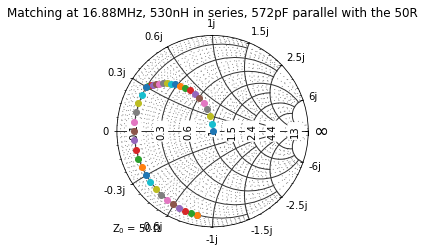

In [23]:
# An online calculator gives Zs, series L of 531.5nH with C of
# 572.1pF in parallel to the 50R at 16.88, Zs = 4.9, -41.5
# ie a lowpass
w = 2 * 3.1415 * 16.88e6
Zstart = 4.9 -41.5j

Zser = 0 +531.5e-9j * w
Zserpath = np.linspace(Zstart, Zstart + Zser, 20)

Cpar = 572.1e-12
Zpar = -1j / (w * Cpar)
Ypar = 1 / Zpar
Ypar_start = 1 / Zserpath[-1]

Yparpath = np.linspace(Ypar_start, Ypar_start + Ypar, 20)
Zparpath = [1/Y for Y in Yparpath]

#plt.figure(figsize=(9, 9))
ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot([Zstart], datatype=SmithAxes.Z_PARAMETER);
plt.plot([Zparpath], datatype=SmithAxes.Z_PARAMETER);
plt.plot([Zserpath], datatype=SmithAxes.Z_PARAMETER);

plt.title(
    'Lowpass matching at 16.88MHz, 530nH in series, 572pF parallel with the 50R' 
);
Zparpath[-1], Zserpath[-1], 1e9 * Zpar / w, 1e9 * Zser / w


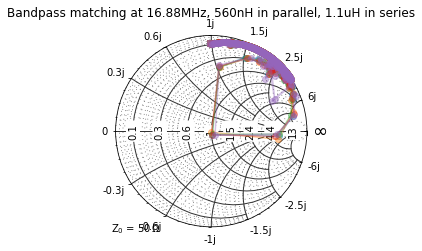

In [67]:
# Now the bandpass match with 560nH in parallel the load then
# 1.1uH in series
# plotted across all freqs and traces
# 16.88, 4.9, -41.5
# Add new columns to each df with the adjusted Z
"""
Index(['Frequency (Hz)', 'Returnloss (dB)', 'Returnphase (°)',
       'Transmissionloss (dB)', 'Transmissionphase (°)', 'Rs (Ohm)',
       'Xs (Ohm)', '|Z| (Ohm)', 'Magnitude', 'SWR', 'Theta',
       'GroupDelay (nS)'],
      dtype='object')
"""
l_ser = 1155e-9
l_par = 560e-9
#plt.figure(figsize=(9, 9))
for df in dfs:
    Ws = 2 * np.pi * df['Frequency (Hz)']
    Zstarts = df['Rs (Ohm)'] + 1j * df['Xs (Ohm)']
    Xl_ser = 1j * l_ser * Ws
    Xl_par = 1j * l_par * Ws
    Yl_par = 1 / Xl_par
    Ypar = Yl_par + 1 / Zstarts # Y of the parallel network
    Zpar = 1 / Ypar
    Zser = Zpar + Xl_ser
    df['Zbandpass'] = Zser
    ax = plt.subplot(1, 1, 1, projection='smith')
    plt.plot(Zser, datatype=SmithAxes.Z_PARAMETER, alpha=0.4);

plt.title(
    'Bandpass matching at 16.88MHz, 560nH in parallel, 1.1uH in series' 
);
#plt.savefig('c:/Temp/matched at 16M.jpg')

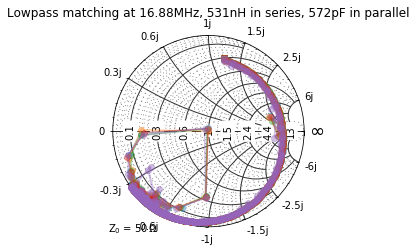

In [68]:
# Now the lowpass match with series L of 531.5nH with C of
# 572.1pF in parallel to the 50R 
# plotted across all freqs and traces
# 16.88, 4.9, -41.5
# Add new columns to each df with the adjusted Z
"""
Index(['Frequency (Hz)', 'Returnloss (dB)', 'Returnphase (°)',
       'Transmissionloss (dB)', 'Transmissionphase (°)', 'Rs (Ohm)',
       'Xs (Ohm)', '|Z| (Ohm)', 'Magnitude', 'SWR', 'Theta',
       'GroupDelay (nS)'],
      dtype='object')
"""
l_ser = 531e-9
c_par = 572e-12
#plt.figure(figsize=(9, 9))
for df in dfs:
    Ws = 2 * np.pi * df['Frequency (Hz)']
    Zstarts = df['Rs (Ohm)'] + 1j * df['Xs (Ohm)']
    Xl_ser = 1j * l_ser * Ws
    Xc_par = -1j / (c_par * Ws)
    Yc_par = 1 / Xc_par
    # start with series L
    Zser = Zstarts + Xl_ser
    # now add parallel C
    Ypar = Yc_par + 1 / Zser # Y of the parallel network
    Zpar = 1 / Ypar
    df['Zlowpass'] = Zpar
    ax = plt.subplot(1, 1, 1, projection='smith')
    plt.plot(Zpar, datatype=SmithAxes.Z_PARAMETER, alpha=0.4);

plt.title(
    'Lowpass matching at 16.88MHz, 531nH in series, 572pF in parallel' 
);
#plt.savefig('c:/Temp/matched at 16M.jpg')

/usr/local/lib/python3.4/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


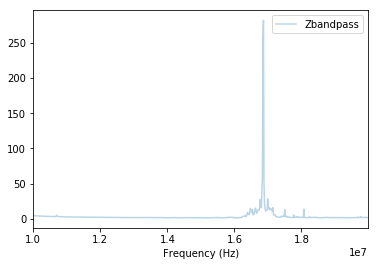

In [40]:
dfs[0].plot('Frequency (Hz)', 'Zbandpass', alpha=0.3)


In [ ]:
df[df['Returnphase (°)']**2 < 1000]

In [ ]:
df[df['Xs (Ohm)']**2 < 0.01]

In [ ]:
# Series rlc response
SmithAxes.update_scParams({"grid.minor.enable": False})

Omegas = np.linspace(10e6, 20e6, 10) * 2 * 3.14159
R = 2.0
L = 290e-9
C = 465e-12
Xs = L * Omegas - 1/(C * Omegas)
Rs = np.ones(Omegas.shape) * R
ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot(Rs, Xs, datatype=SmithAxes.Z_PARAMETER);

In [ ]:
# Parallel lc in series with r response
SmithAxes.update_scParams({"grid.minor.enable": False})
Omegas = np.linspace(10e6, 20e6, 20) * 2 * 3.14159
R = 2.0 * 5
L = 290e-9
C = 465e-12
Xcs = -1/(C * Omegas)
Xls = L * Omegas
Xs = 1/(1/Xcs + 1/Xls)
Rs = np.ones(Omegas.shape) * R
ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot(Rs, Xs, datatype=SmithAxes.Z_PARAMETER);

In [ ]:
Omegas[3]/2/3.14


In [ ]:
pi = 3.14159
s_11 = 0.61*exp(1j * 90/180*pi);
# s_21 = 3.72*exp(j*59/180*pi);
# s_12 = 0.05*exp(j*42/180*pi);
# s_22 = 0.45*exp(j*(-48/180)*pi);
s_11

In [ ]:
import pylab
import scipy
import skrf

#ntwk = rf.Network('ring slot.s2p')
#ntwk.plot_s_smith()
#skrf.network.z2s(np.array([3 -14j]))
2*3.14159*20e6*3.7e-9
#26/180*3.14


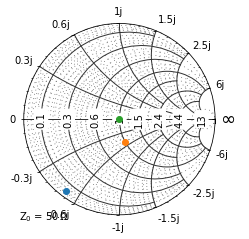

In [57]:
# Choose a Z somewhere around 12M (not from real data)
# call it 2 and -25
ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot([2 -25j], datatype=SmithAxes.Z_PARAMETER);
# adding resistance would move it towards the locus of 50ohms
plt.plot([2+48 -25j], datatype=SmithAxes.Z_PARAMETER);
# Now a little series L
plt.plot([2+48 -25j+25j], datatype=SmithAxes.Z_PARAMETER);

(4.1115026965406296e-07, 1.5252348712973304e-06)

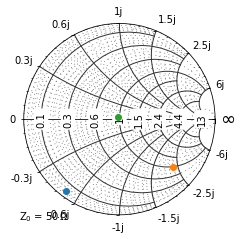

In [58]:
ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot([2 -25j], datatype=SmithAxes.Z_PARAMETER);
# This time add parallel L of 25R
Ylr = 1/(2-25j)
Ynewl = 1/31j
Yt = Ylr + Ynewl
plt.plot([1/Yt], datatype=SmithAxes.Z_PARAMETER);
# Now add series L of +2.5j denorm to 50
plt.plot([(0+115j)+(1/Yt)], datatype=SmithAxes.Z_PARAMETER);
# This is not a good transform - too sensitive to the 31j
# At 12M 31j is 31/w12
31 / (2 * np.pi * 12E6), 115 / (2 * np.pi * 12E6)


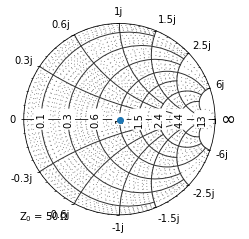

In [59]:
ax = plt.subplot(1, 1, 1, projection='smith')
x = 50.8788993508-1.03272391735j
plt.plot([x], datatype=SmithAxes.Z_PARAMETER);


In [ ]:
1/(10e6*2*3.14159*14.1)

In [ ]:
15.4/(2*3.1415*15e6)

In [ ]:
10e6*2*3.1415*163e-9

In [ ]:
# starting with series model, calc l and c 
# this math is totally wrong !!!
w1=2*3.1415*10e6
x1=-14.1  # @10M
w2=2*3.1415*15e6
x2=15.4  # @15M
c=(w1/w2**.5 - 1/w1) / (x1 - x2*w1/w2)
#c=(w2/w1**.5 - 1/w2) / (x2 - x1*w2/w1)
L = x2/w2 - 1/(c*w2**2)
res_w = (1/(L*c))**.5
res_f = 1 / ( 2 * 3.1415 * (L*c)**.5)
L*1e9, c*1e9, res_f*1e-6

In [ ]:
L*w1-1/(c*w1), L*w2-1/(c*w2), x1/w1 - 1/(c*w1**2)

In [ ]:
# presume xl is 30 at 15M 
1e9*30/w2
#318nH
# What is this at 10M
w1*(30/w2)
# 20
# so cap has to add -34 at 10M
1e9/(w1*34)
# 468pF
# What's the resonance?
1e-6/(2*3.14159*(318e-9*468e-12/2)**.5)
# 13M
# What's the Z at 10M
# wL - 1/wC
w1*318e-9 - 1/(w1*468e-12/2)
# -14
# and now at 15M
#w2*318e-9 - 1/(w2*468e-12/2)
# only 7.2!!

In [62]:
Ypar = complex(0, -2.525/150)
Ypar, 1/Ypar
Ypar.imag

-0.016833333333333332